In [1]:
import os

Change the Working Directory to your required location

In [2]:
os.chdir("C:\\Users\\hr\\Downloads\\ML_Practice\\Kaggle_Competetions\\Titanic")

Import all the necessary libraries for Solving this Problem

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("C:\\Users\\hr\\Downloads\\ML_Practice\\Kaggle_Competetions\\Titanic\\Logistic Regression\\Data\\train.csv")

Data Exploration Begins

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Identify the Null Values in the Dataset and deal with them

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

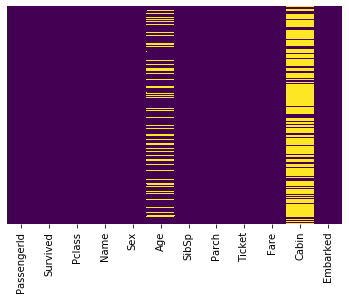

In [7]:
sns.heatmap(data=data.isnull(),yticklabels=False,cmap='viridis',cbar=False)

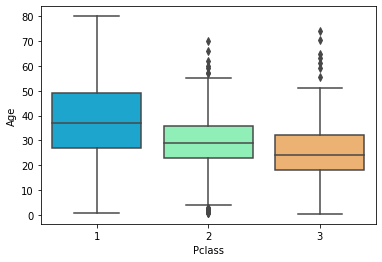

In [8]:
sns.boxplot(x="Pclass",y="Age",data=data,palette='rainbow')

Feature Engineering 

In [9]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [10]:
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1)

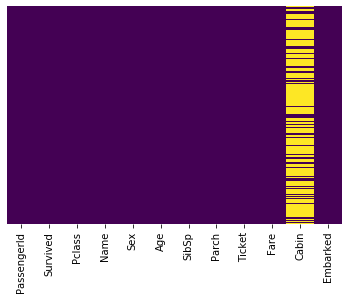

In [11]:
sns.heatmap(data=data.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [12]:
data.drop(['Cabin'],axis=1,inplace=True)

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
dummies=pd.get_dummies(data.Embarked)
dummies2 = pd.get_dummies(data.Sex)

In [18]:
dummies2

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [19]:
merge = pd.concat([data,dummies,dummies2],axis=1)

In [20]:
merge.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1,0,1


In [21]:
data2 = merge.drop(['PassengerId','Name','Sex','Ticket','Embarked','Q','female'],axis=1)

In [22]:
data2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


In [23]:
data2.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
C           0
S           0
male        0
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_in = data2.drop(['Survived'],axis=1)

In [26]:
train_out = data2['Survived']

In [27]:
train_in.head()

,Pclass,Age,SibSp,Parch,Fare,C,S,male
0,3,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,1,0,0
2,3,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,1,0
4,3,35.0,0,0,8.0500,0,1,1


In [28]:
train_out.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Split the Data into train and test sets

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(train_in,train_out,test_size = 0.25,random_state = 50)

In [31]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,C,S,male
358,3,24.0,0,0,7.8792,0,0,0
331,1,45.5,0,0,28.5000,0,1,1
354,3,24.0,0,0,7.2250,1,0,1
374,3,3.0,3,1,21.0750,0,1,0
359,3,24.0,0,0,7.8792,0,0,0


In [32]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,C,S,male
558,1,39.0,1,1,79.6500,0,1,0
547,2,29.0,0,0,13.8625,1,0,1
494,3,21.0,0,0,8.0500,0,1,1
679,1,36.0,0,1,512.3292,1,0,1
7,3,2.0,3,1,21.0750,0,1,1


In [33]:
y_train.head()

358    1
331    0
354    0
374    0
359    1
Name: Survived, dtype: int64

In [34]:
y_test.head()

558    1
547    1
494    0
679    1
7      0
Name: Survived, dtype: int64

In [35]:
freq_table = x_train.groupby(['Pclass']).size()

In [36]:
freq_table

Pclass
1    175
2    134
3    359
dtype: int64

In [37]:
freq_table1 = train_in.groupby(['Pclass']).size()

In [38]:
freq_table1

Pclass
1    216
2    184
3    491
dtype: int64

In [39]:
freq_table2 = train_in.groupby(['SibSp']).size()

In [40]:
freq_table2

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

In [41]:
freq_table3 = train_in.groupby(['Parch']).size()

In [42]:
freq_table3

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

In [43]:
freq_table4 = train_in.groupby(['male']).size()

In [44]:
freq_table4

male
0    314
1    577
dtype: int64

In [45]:
from sklearn.linear_model import LogisticRegression

Train the Model using the Logistic Regression Algorithm

In [46]:
model=LogisticRegression()

In [47]:
model.fit(x_train,y_train)

C:\Users\hr\anaconda_new\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
predict = model.predict(x_test)

In [49]:
predict

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Calculate the Accuracy of the model

In [51]:
accuracy = confusion_matrix(y_test, predict)

In [52]:
accuracy

array([[116,  14],
       [ 31,  62]], dtype=int64)

In [53]:
score = accuracy_score(y_test,predict)
score

0.7982062780269058

In [54]:
test_data = pd.read_csv("C:\\Users\\hr\\Downloads\\ML_Practice\\Kaggle_Competetions\\Titanic\\Logistic Regression\\Data\\test.csv")

In [55]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

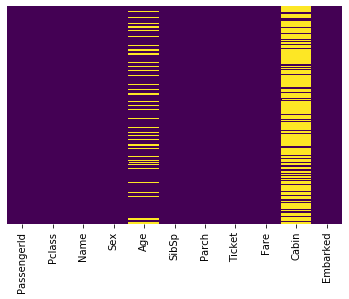

In [57]:
sns.heatmap(data=test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

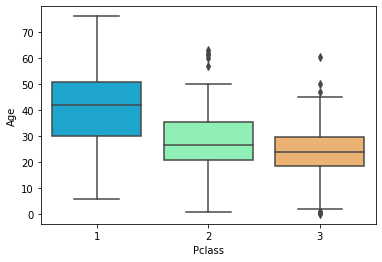

In [58]:
sns.boxplot(x="Pclass",y="Age",data=test_data,palette='rainbow')

In [59]:
def impute_age1(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 27
        else:
            return 24
    else:
        return Age

In [60]:
test_data['Age']=test_data[['Age','Pclass']].apply(impute_age1,axis=1)

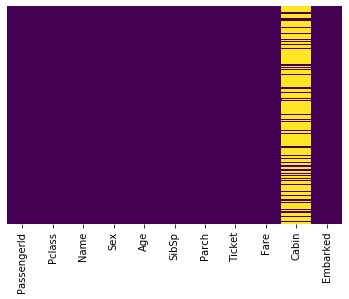

In [61]:
sns.heatmap(data =test_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [62]:
dummies5 = pd.get_dummies(test_data.Embarked)
dummies6 = pd.get_dummies(test_data.Sex)

In [63]:
merged2 = pd.concat([test_data,dummies5,dummies6],axis=1)

In [64]:
merged2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0


In [65]:
final_test=merged2.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked','Q','female'],axis=1)

In [66]:
final_test.head()

,Pclass,Age,SibSp,Parch,Fare,C,S,male
0,3,34.5,0,0,7.8292,0,0,1
1,3,47.0,1,0,7.0000,0,1,0
2,2,62.0,0,0,9.6875,0,0,1
3,3,27.0,0,0,8.6625,0,1,1
4,3,22.0,1,1,12.2875,0,1,0


In [67]:
final_test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      1
C         0
S         0
male      0
dtype: int64

In [68]:
test_data['Fare'].median()

14.4542

In [69]:
final_test['Fare'].fillna(value=14.45)

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [70]:
final_test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      1
C         0
S         0
male      0
dtype: int64

In [71]:
new = final_test.dropna()

In [72]:
new.head()

,Pclass,Age,SibSp,Parch,Fare,C,S,male
0,3,34.5,0,0,7.8292,0,0,1
1,3,47.0,1,0,7.0000,0,1,0
2,2,62.0,0,0,9.6875,0,0,1
3,3,27.0,0,0,8.6625,0,1,1
4,3,22.0,1,1,12.2875,0,1,0


In [73]:
final_test.shape

(418, 8)

In [74]:
new.shape

(417, 8)

In [75]:
final_predict = model.predict(new)
final_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [76]:
merged2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0


In [77]:
merged2.shape

(418, 16)

In [78]:
data3=merged2.drop(['Name','Sex','Ticket','Cabin','Embarked','female'],axis=1)

In [79]:
data3.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
C              0
Q              0
S              0
male           0
dtype: int64

In [80]:
data4=data3.dropna()

In [81]:
data4.shape

(417, 10)

In [82]:
submission = pd.DataFrame({'Passenger ID':data4.PassengerId,'Survived':final_predict})

In [83]:
submission.head()

,Passenger ID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [86]:
submission.reset_index(drop=True)

,Passenger ID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
412,1305,0
413,1306,1
414,1307,0
415,1308,0
